# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
random_state = 42

## Load Data

In [2]:
hf_data_file = "data/en_hf_112024.csv"
hf_df = pd.read_csv(hf_data_file)
hf_df.head()

,text,labels,source,dataset,nb_annotators,post_author_country_location
0,"According to a recent OFSTED report, a school ...",1.0,NGO,CONAN,1,unknown
1,In Birmingham there is a school where girls an...,1.0,NGO,CONAN,1,unknown
2,A school in Birningham is still separating gir...,1.0,NGO,CONAN,1,unknown
3,The police and politicians are covering up the...,1.0,NGO,CONAN,1,unknown
4,Muslims grooming gangs are protected by the go...,1.0,NGO,CONAN,1,unknown


In [3]:
print(f"Number of Rows: {hf_df.shape[0]}, Number of Columns: {hf_df.shape[1]}")

Number of Rows: 360493, Number of Columns: 6


## Data Cleaning

In [4]:
# Print Datatypes
hf_df.dtypes

text                             object
labels                          float64
source                           object
dataset                          object
nb_annotators                    object
post_author_country_location     object
dtype: object

In [5]:
hf_df['text'] = hf_df['text'].astype('string') # Convert text to string
hf_df['labels'] = hf_df['labels'].astype(int) # Convert labels to int
hf_df = hf_df.dropna(axis = 0, subset = ['text', 'labels']).reset_index(drop = True) # Drop NAs
hf_df = hf_df.rename(columns = {'labels': 'label'}).reset_index(drop = True) # Rename Labels -> Label
hf_df = hf_df[['text', 'label', 'source']] # Only keep text, label, and source
hf_df.head()

,text,label,source
0,"According to a recent OFSTED report, a school ...",1,NGO
1,In Birmingham there is a school where girls an...,1,NGO
2,A school in Birningham is still separating gir...,1,NGO
3,The police and politicians are covering up the...,1,NGO
4,Muslims grooming gangs are protected by the go...,1,NGO


## Exploratory Statistics

/var/folders/qj/tspvs3x90hg30hgcctblgwfh0000gn/T/ipykernel_6780/2760586597.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")


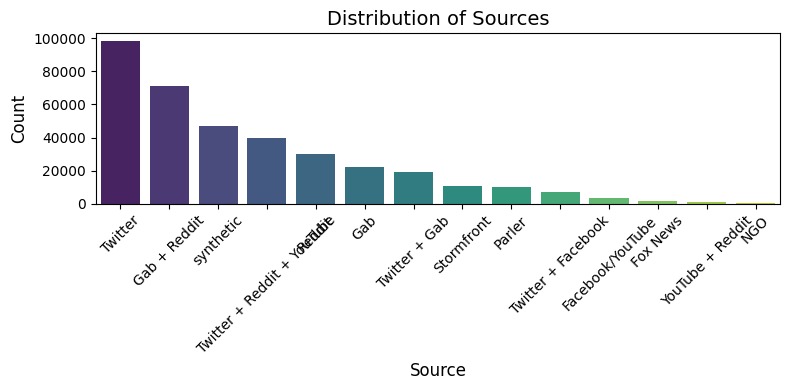

In [6]:
# Compute value counts
source_counts = hf_df['source'].value_counts()

# Create a Seaborn barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Sources", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/qj/tspvs3x90hg30hgcctblgwfh0000gn/T/ipykernel_6780/1667929758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="mako")


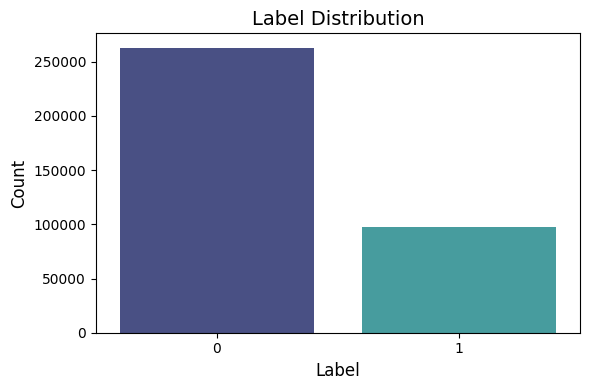

In [7]:
# Compute label counts
label_counts = hf_df['label'].value_counts()

# Create a Seaborn barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="mako")

# Add labels and title
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Train-Dev-Test Split

In [8]:
# First split: train (80%) and temp (20%)
train_df, temp_df = train_test_split(hf_df, test_size=0.2, random_state=random_state, shuffle = True, stratify = hf_df['label'])

# Second split: dev (10%) and test (10%)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=random_state, shuffle = True, stratify = temp_df['label'])

# Reset index for train
train_df = train_df.reset_index(drop = True)

# Reset index for dev
dev_df = dev_df.reset_index(drop = True)

# Reset index for test
test_df = test_df.reset_index(drop = True)

# Check sizes
print(len(train_df), len(dev_df), len(test_df))

288393 36049 36050


In [9]:
train_df.head()

,text,label,source
0,@USER I fucking did you cheeky cunt✋🏼😂,1,Twitter
1,// i’m an epidemiologist. when i heard about b...,0,Twitter
2,i thought there was lots of passages in the qu...,0,Twitter + Gab
3,"Lots of mainstream media shows pushing the ""l...",0,Gab + Reddit
4,White people will always be better than black ...,1,synthetic


In [10]:
dev_df.head()

,text,label,source
0,You basically belittled an entire subculture b...,0,Gab
1,<user> <user> <user> he wants a white ethnosta...,0,Twitter + Gab
2,Fake.,0,Reddit
3,The UK is full of lazy Camel Jockeys,1,synthetic
4,• Wildcats beat Tigers • I. Quickley (UK) 18 P...,0,Twitter


In [11]:
test_df.head()

,text,label,source
0,Just a second and I 'll pipe you all aboard .....,0,Stormfront
1,@USER my feelings exactly.,0,Twitter
2,This is subjugating the wisdom of God to your ...,0,Gab
3,Hahaha... Twitter put me on a limited state fo...,1,Gab + Reddit
4,You are a used up old roastie now no Chad is g...,1,Twitter + Reddit + YouTube


## Save Train-Dev-Test Data to CSV Files

In [12]:
train_df.to_csv("data/training_data_cleaned.csv")
dev_df.to_csv("data/dev_data_cleaned.csv")
test_df.to_csv("data/test_data_cleaned.csv")